# Single nn.Linear

In [52]:
import torch
import torch.nn as nn # forward하는데 매우 많이 쓸 것임.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'x')

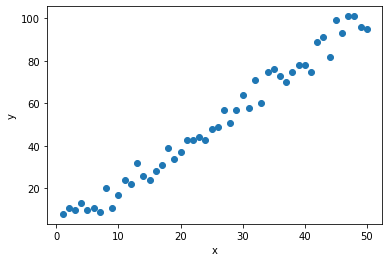

In [53]:

# create data
X = torch.linspace(1,50,50).reshape(-1,1)

# create error data
torch.manual_seed(42)
e = torch.randint(-8,9, (50,1), dtype = torch.float)

# formula
y = 2*X + 1 + e

# plot
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')

#### 여기서 문제점이 하나 있는데, X를 만들때 requires_grad = True를 안했다. 이렇게 하면 무슨 문제가 있냐면, y.backward()가 작동하지 않는다. 왜냐하면 토치가 operation을 추적하지 않기 때문에 X와 y의 관계를 모름.

# Linear Model

In [54]:
# Linear Model은 tensorflow에서 Dense라고 생각하면 편하다.

class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
    
model = Model(1,1)
print(model)
print('---------------------------------')
print('Weight:', model.linear.weight.item())
print('Bias:', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
---------------------------------
Weight: -0.9899084568023682
Bias: -0.3863605260848999


In [55]:
# 모델이 복잡해지면 아래와같은 방법을 사용하는게 좋다.

for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 -0.9899084568023682
linear.bias 	 -0.3863605260848999


# Train
- set : criterion, optimizer

In [56]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

n_epochs = 30
losses = []
for i in range(n_epochs):
    #0. for문이 0부터 시작하니까 i를 1로 바꾸기 위해
    i += 1
    
    #1. forward
    y_pred = model.forward(X)
    
    #2. calculate loss
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    
    #3. print(loss)
    if i % 10 == 0:
        print(f'epoch: {i:2} loss: {loss.item():10.8f}')
    
    #3-1. optimizer : gradient
    optimizer.zero_grad()
    
    #4. backprop
    loss.backward()
    
    #5. update parameter
    optimizer.step()

epoch: 10 loss: 40.02252579
epoch: 20 loss: 19.86588860
epoch: 30 loss: 19.83869934


Text(0.5, 0, 'epoch')

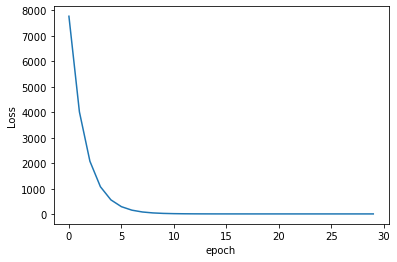

In [57]:
plt.plot(range(n_epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [58]:
x1 = np.array([X.min(),X.max()])
print(x1)

w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

[ 1. 50.]
Current weight: 2.01125813, Current bias: -0.29454845

[ 1. 50.]
[  1.7167096 100.26836  ]


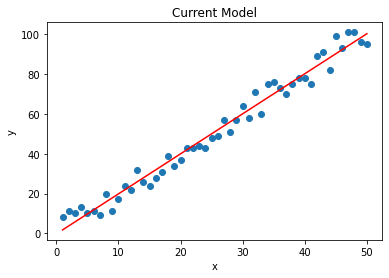

In [59]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');